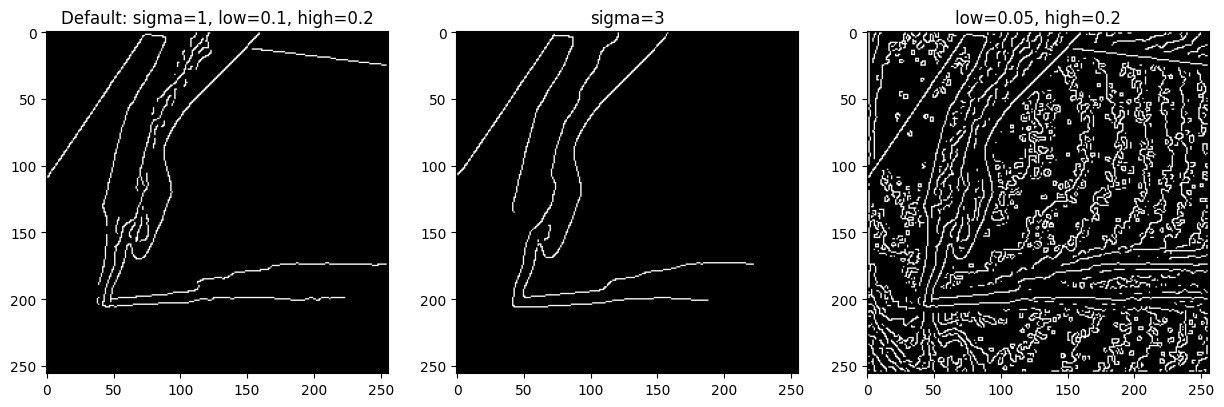

In [3]:
import skimage.io
import skimage.feature
import matplotlib.pyplot as plt

# Load image
image = skimage.io.imread('../TestImages/Week 1/hand.tiff', as_gray=True)

# Apply Canny with different parameters
edges_default = skimage.feature.canny(image)
edges_sigma3 = skimage.feature.canny(image, sigma=3)
edges_low_high = skimage.feature.canny(image, low_threshold=0.05, high_threshold=0.2)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(edges_default, cmap='gray')
axes[0].set_title('Default: sigma=1, low=0.1, high=0.2')
axes[1].imshow(edges_sigma3, cmap='gray')
axes[1].set_title('sigma=3')
axes[2].imshow(edges_low_high, cmap='gray')
axes[2].set_title('low=0.05, high=0.2')
plt.show()

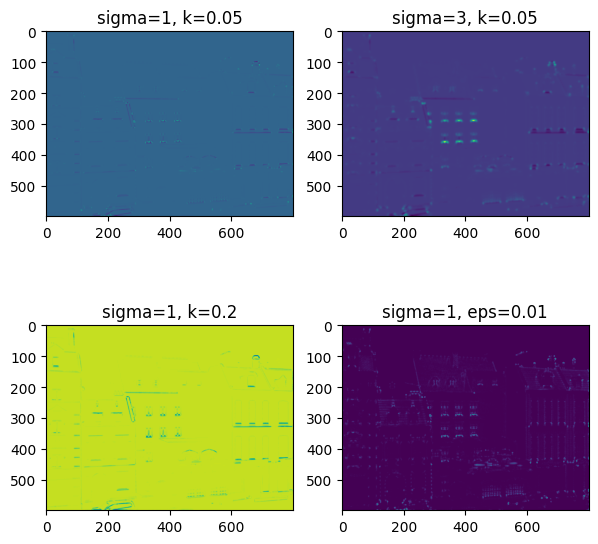

In [8]:
image_house = skimage.io.imread('../TestImages/Week 1/modelhouses.png', as_gray=True)

# Compute Harris responses
harris1 = skimage.feature.corner_harris(image_house, sigma=1, k=0.05, method='k')
harris2 = skimage.feature.corner_harris(image_house, sigma=3, k=0.05, method='k')
harris3 = skimage.feature.corner_harris(image_house, sigma=1, k=0.2, method='k')
harris4 = skimage.feature.corner_harris(image_house, sigma=1, method='eps', eps=0.01)

# Visualize feature maps
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes[0,0].imshow(harris1, cmap='viridis')
axes[0,0].set_title('sigma=1, k=0.05')
axes[0,1].imshow(harris2, cmap='viridis')
axes[0,1].set_title('sigma=3, k=0.05')
axes[1,0].imshow(harris3, cmap='viridis')
axes[1,0].set_title('sigma=1, k=0.2')
axes[1,1].imshow(harris4, cmap='viridis')
axes[1,1].set_title('sigma=1, eps=0.01')
plt.show()

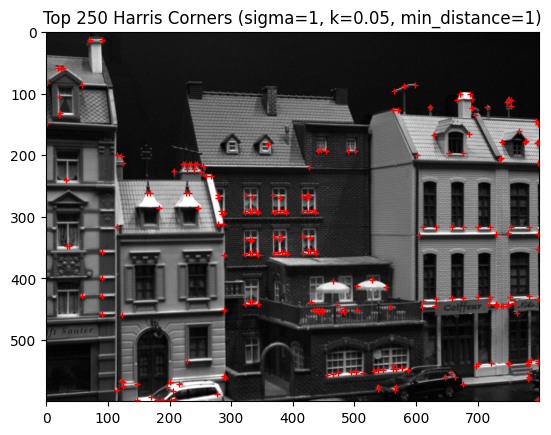

In [6]:
def find_harris_corners(image, sigma=1, k=0.05, method='k', min_distance=1, num_peaks=250):
    from skimage.feature import corner_harris, corner_peaks
    response = corner_harris(image, sigma=sigma, k=k, method=method)
    coords = corner_peaks(response, min_distance=min_distance, num_peaks=num_peaks)
    return coords

coords = find_harris_corners(image_house, sigma=1, k=0.05)

# Plot corners
plt.imshow(image_house, cmap='gray')
plt.plot(coords[:, 1], coords[:, 0], 'r+', markersize=5)
plt.title('Top 250 Harris Corners (sigma=1, k=0.05, min_distance=1)')
plt.show()